## Импорт библиотек

In [1]:
from PIL import Image
import os
from tqdm import tqdm
from typing import Optional, Any, List
import torch
import numpy as np
import clip
from torch import nn
from PIL import Image

from src.data.preprocessing import split_and_save_image
from src.models.evaluation import calculate_metrics
from src.models.clip_finetune import CLIPFineTuneModel

Using CPU. Note: This module is much faster with a GPU.


## Препроцессинг

In [2]:
input_image_path = "data/raw"
output_folder_path = "data/interim/objects"

files = os.listdir(input_image_path)
jpg_files = [file for file in files if file.endswith('.jpg')]
len(jpg_files)

for file in tqdm(jpg_files):
    foldername = split_and_save_image(file, input_image_path, output_folder_path, save_to_tmp=False)

  0%|          | 4/970 [00:00<01:10, 13.63it/s]

100%|██████████| 970/970 [00:19<00:00, 48.55it/s]


## Подгрузка и запуск модели

In [3]:
# Загрузка предварительно обученной модели CLIP
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Инициализация модели надстройки
finetune_model = CLIPFineTuneModel(model).to(device)

# Путь к сохраненной модели
model_path = 'models/finetuned_clip_model_roc09997.pth'

# Загрузка весов в модель
finetune_model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
finetune_model.eval()  # Переключение модели в режим оценки

CLIPFineTuneModel(
  (clip_model): CLIP(
    (visual): VisionTransformer(
      (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
      (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (transformer): Transformer(
        (resblocks): Sequential(
          (0): ResidualAttentionBlock(
            (attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
            )
            (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (mlp): Sequential(
              (c_fc): Linear(in_features=768, out_features=3072, bias=True)
              (gelu): QuickGELU()
              (c_proj): Linear(in_features=3072, out_features=768, bias=True)
            )
            (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          )
          (1): ResidualAttentionBlock(
            (attn): MultiheadAttention(
              (out_proj): NonDynamicall

## Подсчёт метрик на тестовой выборке

In [4]:
error_files, error_answers = calculate_metrics(finetune_model, preprocess, 
                                                input_image_path="data/raw",

                                                visualize=False)
#                                                path_to_chosen_files="test_files.txt", 

  0%|          | 0/970 [00:00<?, ?it/s]c:\Users\epsil\OneDrive\Документы\zennolab\capcha_solver\src\data\crop_squares.py:42: RuntimeWarning: invalid value encountered in divide
  unit_image = image/np.sqrt(np.tile(np.sum(image*image, axis=2), (3,1,1)).transpose(1,2,0))
100%|██████████| 970/970 [37:03<00:00,  2.29s/it]

Number of evaluated samples: 970
Accuracy: 0.8484536082474227
Accuracy without exceptions: 0.8858988159311088


In [5]:
print(f"Всего {len(error_files)} неправильных ответов")
print(error_files) 
print(error_answers)

Всего 106 неправильных ответов
['183161.jpg', '183232.jpg', '183253.jpg', '183276.jpg', '183292.jpg', '183297.jpg', '183332.jpg', '183340.jpg', '183366.jpg', '183412.jpg', '183449.jpg', '183462.jpg', '183484.jpg', '183487.jpg', '183518.jpg', '183520.jpg', '183554.jpg', '183565.jpg', '183589.jpg', '183610.jpg', '183634.jpg', '183643.jpg', '183662.jpg', '183664.jpg', '183709.jpg', '183735.jpg', '183772.jpg', '183804.jpg', '183821.jpg', '183823.jpg', '183887.jpg', '183894.jpg', '183943.jpg', '184027.jpg', '184072.jpg', '184127.jpg', '184236.jpg', '184244.jpg', '184319.jpg', '184352.jpg', '184386.jpg', '184391.jpg', '184402.jpg', '184407.jpg', '184435.jpg', '184452.jpg', '184471.jpg', '184535.jpg', '184537.jpg', '184613.jpg', '184658.jpg', '184674.jpg', '184679.jpg', '184717.jpg', '184760.jpg', '184849.jpg', '184911.jpg', '184915.jpg', '184933.jpg', '184964.jpg', '184999.jpg', '185003.jpg', '185020.jpg', '185026.jpg', '185065.jpg', '185100.jpg', '185141.jpg', '185161.jpg', '185202.jpg', '1

## Визуализация работы модели

  0%|          | 0/1 [00:00<?, ?it/s]

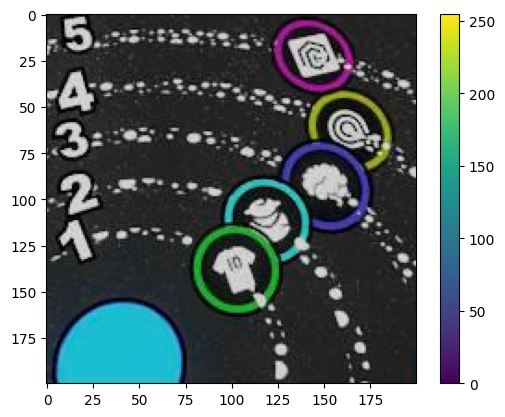

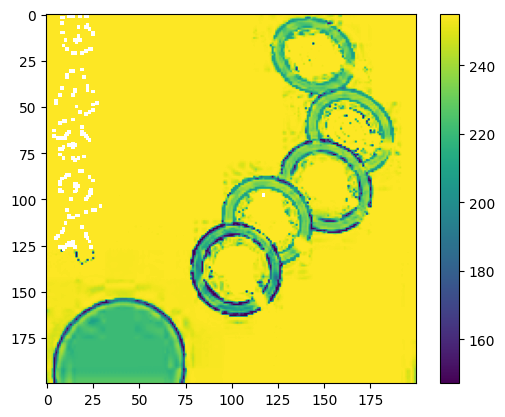

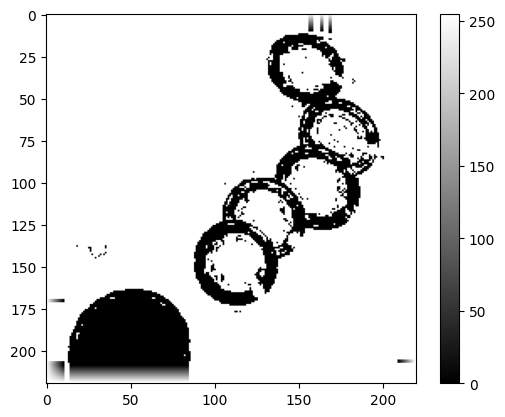

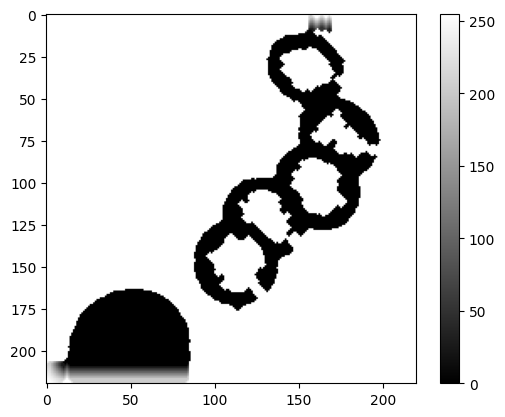

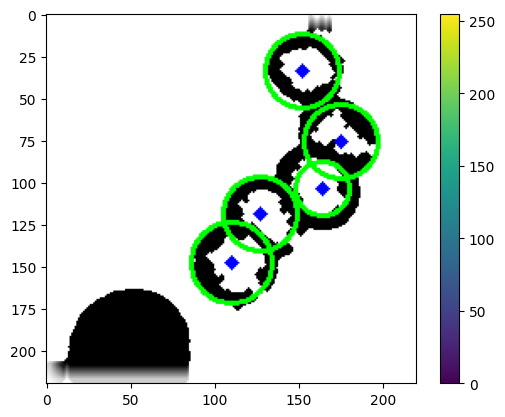

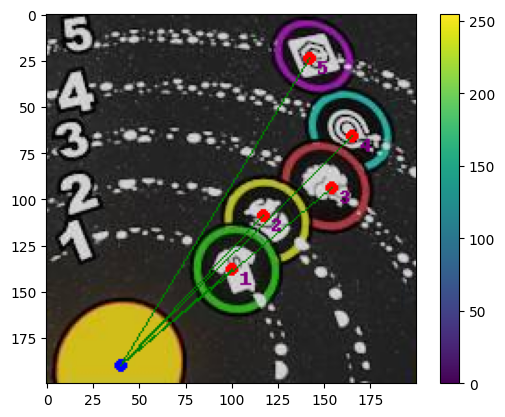

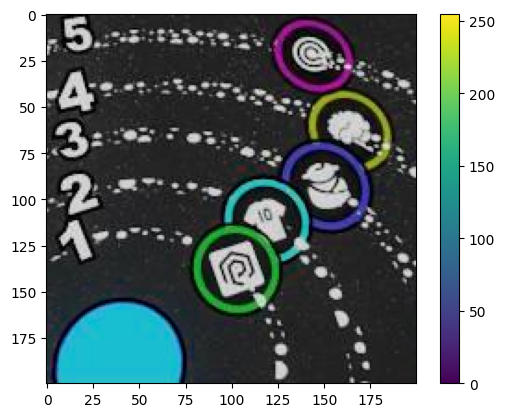

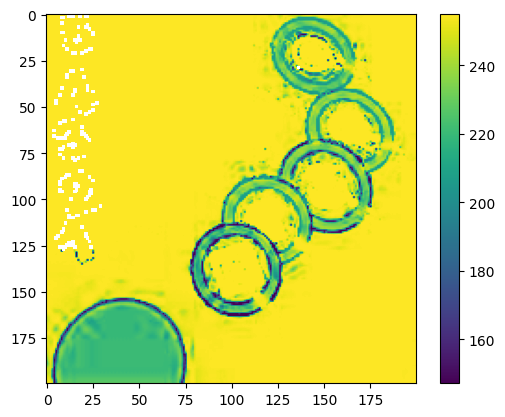

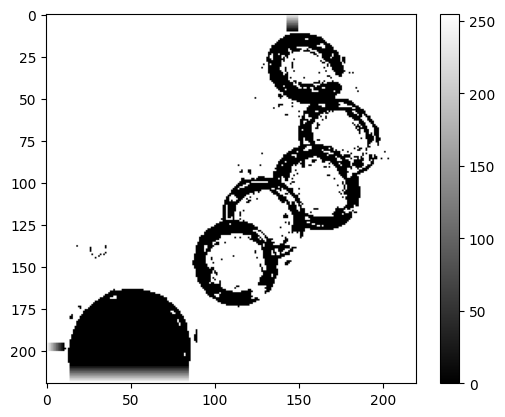

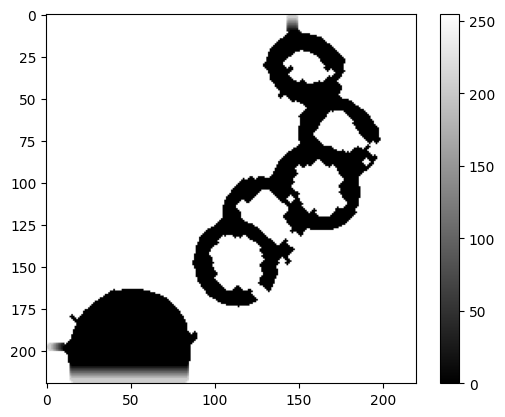

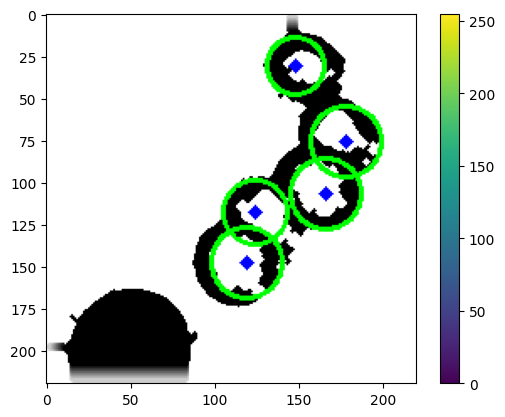

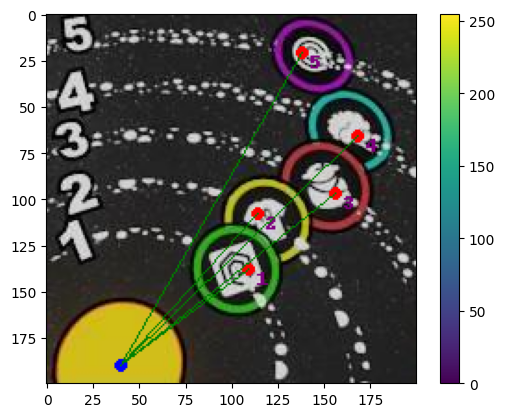

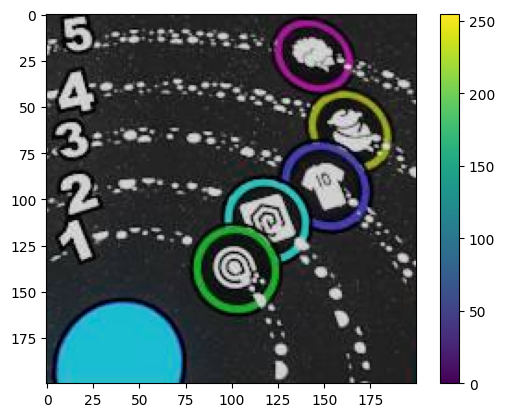

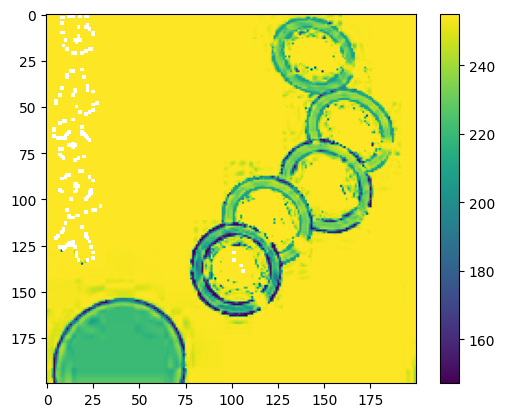

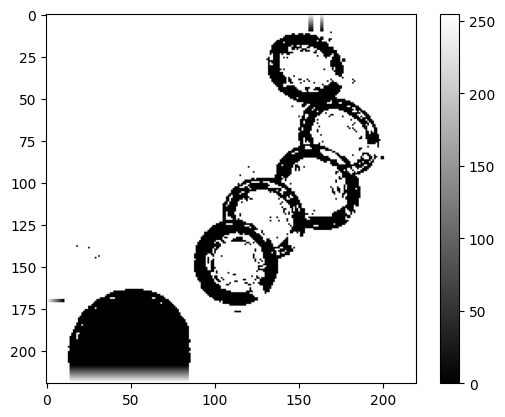

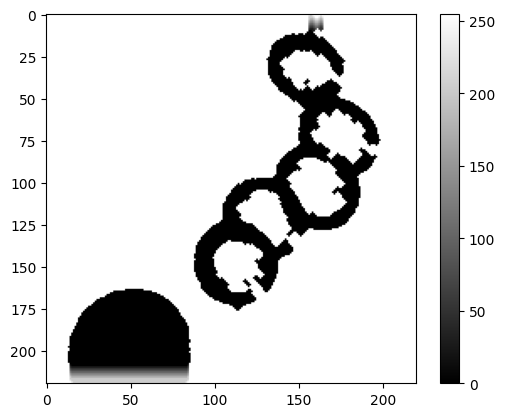

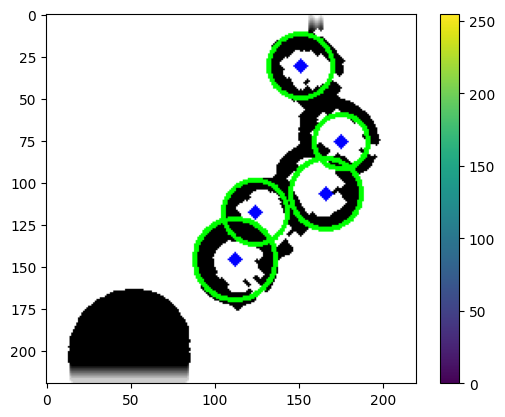

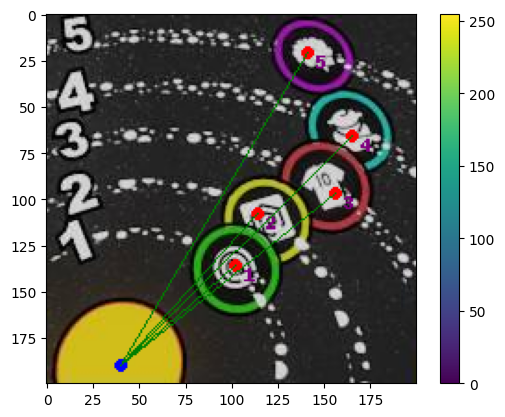

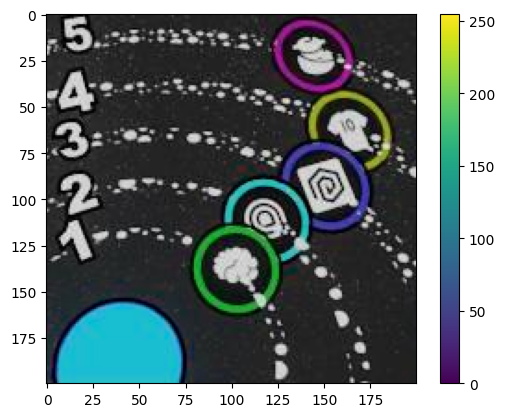

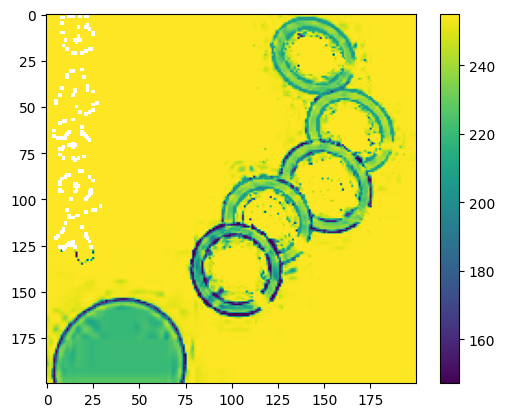

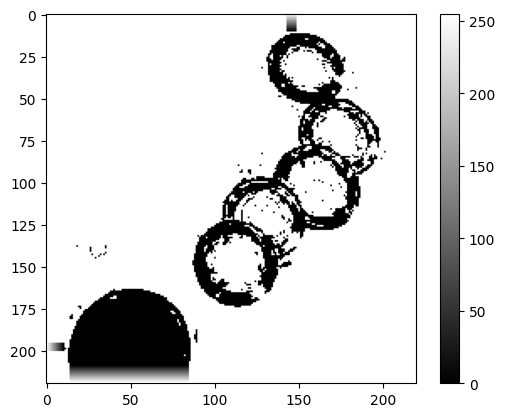

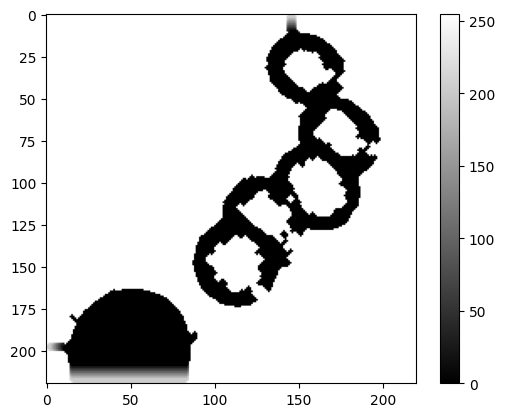

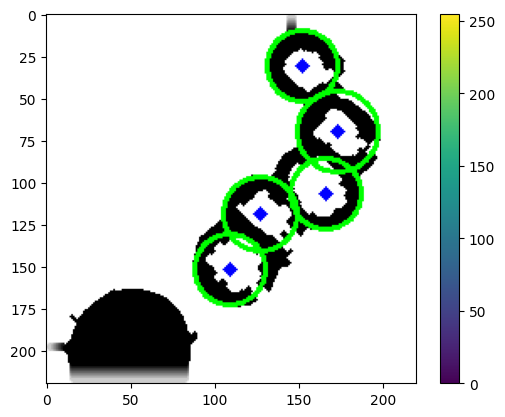

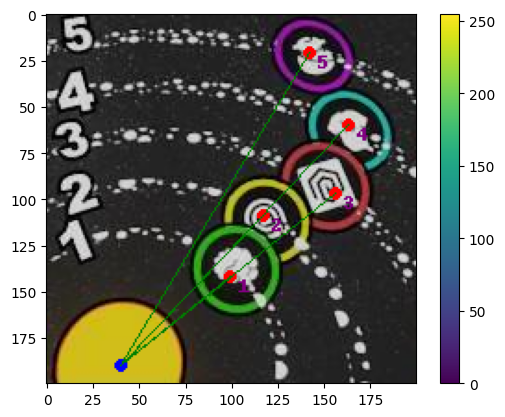

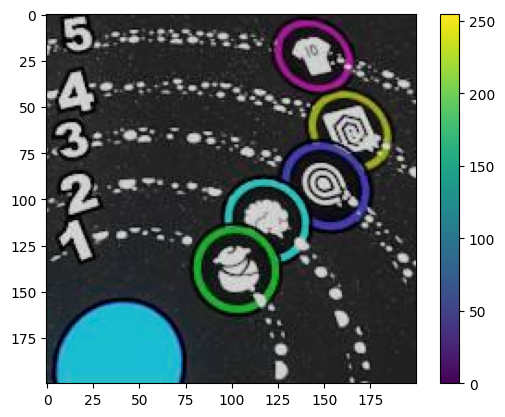

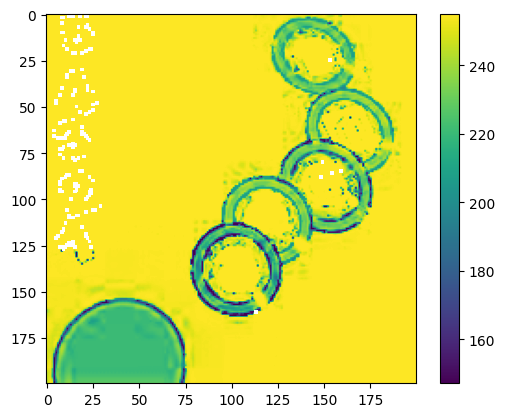

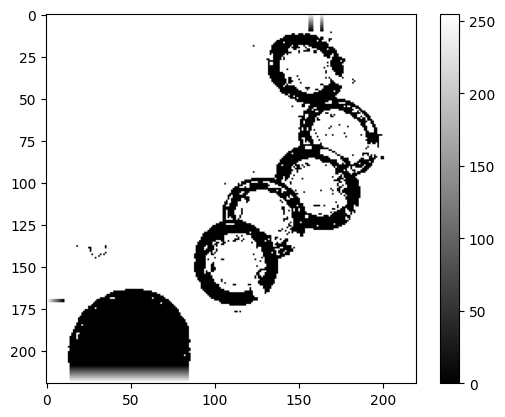

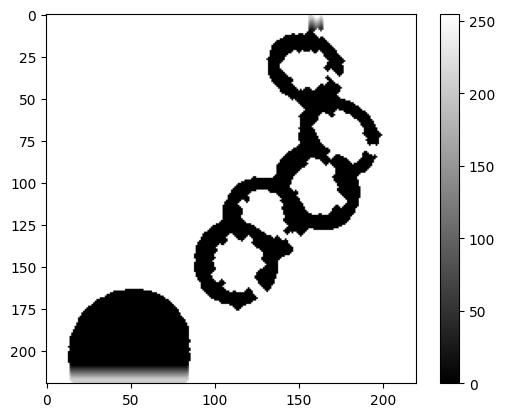

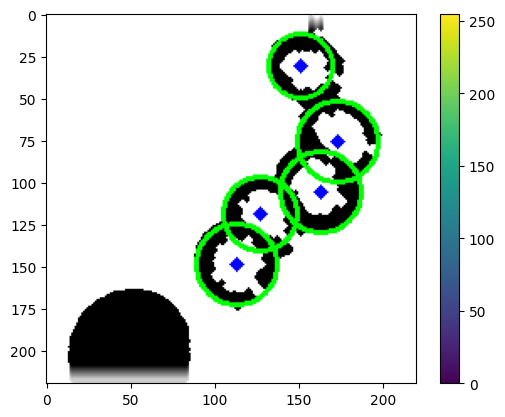

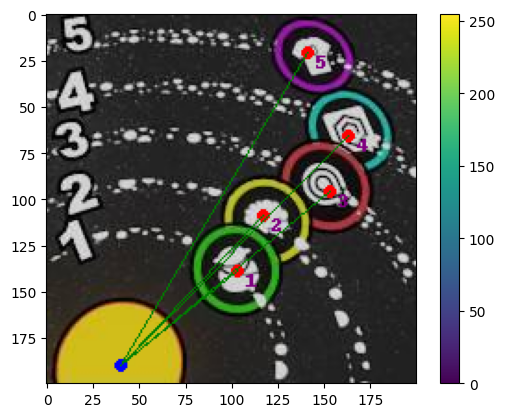

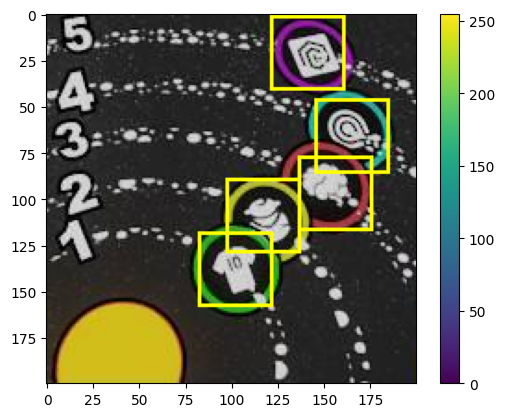

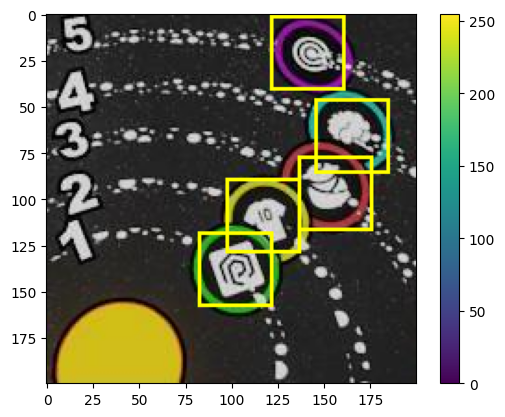

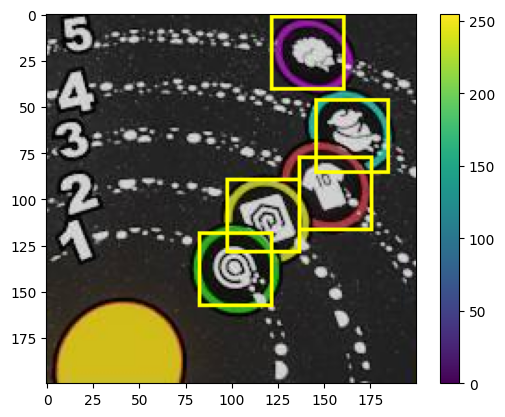

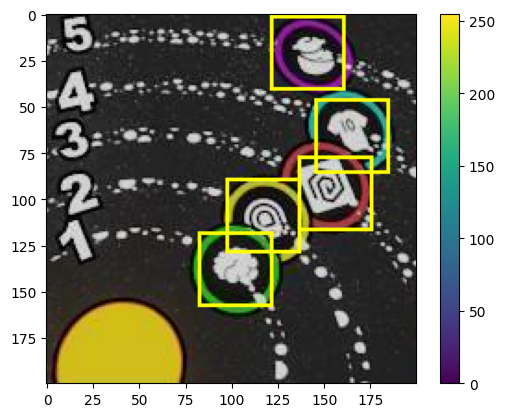

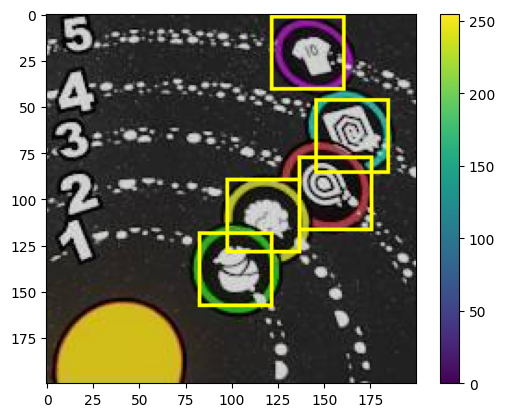

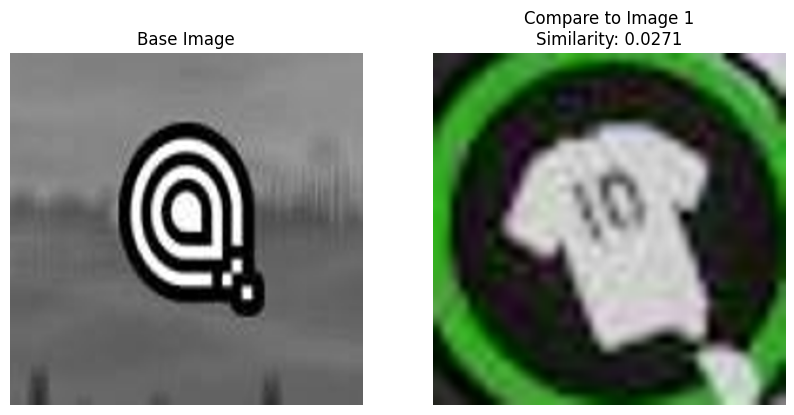

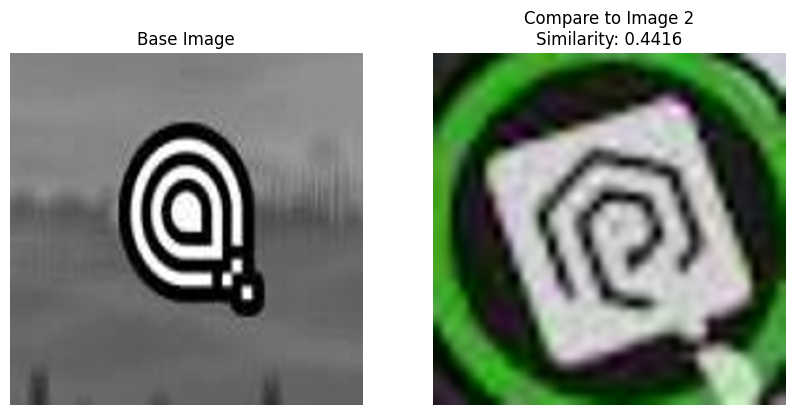

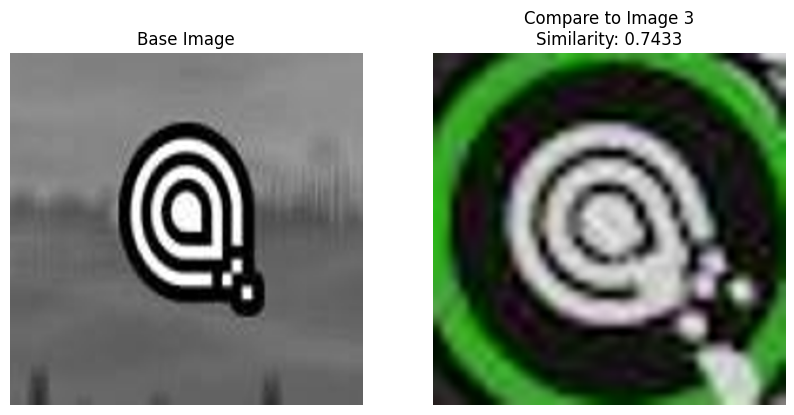

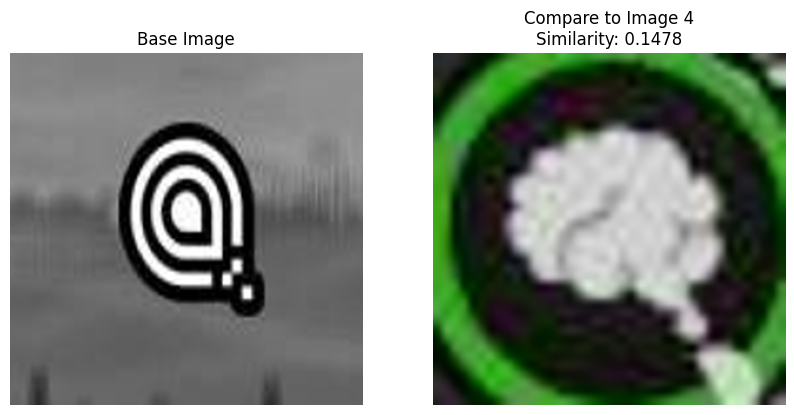

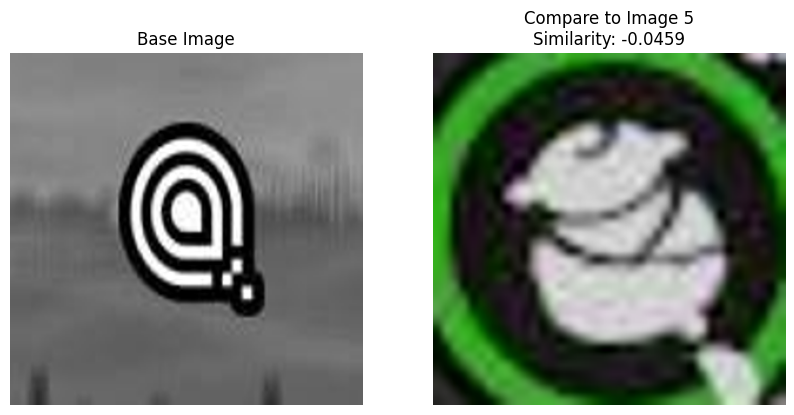

100%|██████████| 1/1 [00:10<00:00, 10.58s/it]

Number of evaluated samples: 1
Accuracy: 1.0
Accuracy without exceptions: 1.0


In [6]:
error_files, error_answers = calculate_metrics(finetune_model, preprocess, 
                                                path_to_chosen_files="example_files.txt", 
                                                input_image_path="data/raw",
                                                visualize=True)